In [1]:
!pip install quandl
import quandl
import datetime

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 2.1 MB/s eta 0:00:00


In [2]:
quandl.ApiConfig.api_key = "Please Use Your Own Api Key from Quandl"

In [77]:
import pandas as pd

df = pd.read_csv('../Stock-price-predicition/csv files/AAPL.csv',header=0, index_col=0)



In [16]:
# df = quandl.get("NSE/TCS", start_date="2013-01-01", end_date="2018-05-18",)

In [80]:
df.head()

,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume
Date,,,,,,,,,,,,
2011-10-04,374.57,381.80,354.2400,372.50,44059900.0,0.0,1.0,47.964530,48.890347,45.361228,47.699462,308419300.0
2011-10-05,367.86,379.82,360.3000,378.25,28088200.0,0.0,1.0,47.105299,48.636804,46.137224,48.435762,196617400.0
2011-10-06,373.33,384.78,371.8045,377.37,29020800.0,0.0,1.0,47.805745,49.271943,47.610401,48.323076,203145600.0
2011-10-07,375.78,377.74,368.4890,369.80,19123500.0,0.0,1.0,48.119473,48.370455,47.185844,47.353721,133864500.0
2011-10-10,379.09,388.81,378.2100,388.81,15804100.0,0.0,1.0,48.543326,49.787994,48.430640,49.787994,110628700.0


In [81]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividend', 'Split',
       'Adj_Open', 'Adj_High', 'Adj_Low', 'Adj_Close', 'Adj_Volume'],
      dtype='object')

In [82]:
df.drop(df.columns[[4,5, 6, 7, 8, 9, 10, 11]], axis=1, inplace=True)

In [83]:
df.head()

,Open,High,Low,Close
Date,,,,
2011-10-04,374.57,381.80,354.2400,372.50
2011-10-05,367.86,379.82,360.3000,378.25
2011-10-06,373.33,384.78,371.8045,377.37
2011-10-07,375.78,377.74,368.4890,369.80
2011-10-10,379.09,388.81,378.2100,388.81


In [84]:
df['High'] = df['High'] / 10000
df['Open'] = df['Open'] / 10000
df['Low'] = df['Low'] / 10000
df['Close'] = df['Close'] / 10000
print(df.head())
print(df.tail())

                Open      High       Low     Close
Date                                              
2011-10-04  0.037457  0.038180  0.035424  0.037250
2011-10-05  0.036786  0.037982  0.036030  0.037825
2011-10-06  0.037333  0.038478  0.037180  0.037737
2011-10-07  0.037578  0.037774  0.036849  0.036980
2011-10-10  0.037909  0.038881  0.037821  0.038881
                Open      High       Low     Close
Date                                              
2018-01-26  0.017200  0.017200  0.017006  0.017151
2018-01-29  0.017016  0.017016  0.016707  0.016796
2018-01-30  0.016553  0.016737  0.016470  0.016697
2018-01-31  0.016687  0.016844  0.016650  0.016743
2018-02-01  0.016716  0.016862  0.016676  0.016778


In [85]:
data = df.to_numpy()

In [86]:
data

array([[0.037457  , 0.03818   , 0.035424  , 0.03725   ],
       [0.036786  , 0.037982  , 0.03603   , 0.037825  ],
       [0.037333  , 0.038478  , 0.03718045, 0.037737  ],
       ...,
       [0.0165525 , 0.016737  , 0.01647   , 0.016697  ],
       [0.016687  , 0.01684417, 0.01665   , 0.016743  ],
       [0.0167165 , 0.016862  , 0.016676  , 0.016778  ]])

In [87]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# from pandas import datetime
import math
import itertools
from sklearn import preprocessing
import datetime
from sklearn.metrics import mean_squared_error
from math import sqrt

In [88]:
result = []
sequence_length = 6
for index in range(len(data) - sequence_length):
    result.append(data[index: index + sequence_length])
    
result = np.array(result)
row = round(0.8 * result.shape[0])

#creating training data
train = result[:int(row), :]

x_train = train[:, :-1]
y_train = train[:, -1][:,-1]
x_test = result[int(row):, :-1]
y_test = result[int(row):, -1][:,-1]

amount_of_features = len(df.columns)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], amount_of_features))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], amount_of_features)) 

print("X_train", x_train.shape)
print("y_train", y_train.shape)
print("X_test", x_test.shape)
print("y_test", y_test.shape)

X_train (1270, 5, 4)
y_train (1270,)
X_test (317, 5, 4)
y_test (317,)


In [89]:
from __future__ import print_function
import math
#importing keras modules
from keras.models import Sequential
from keras.layers import Dense, Activation ,Dropout , Flatten , Conv1D , MaxPooling1D
from keras.layers import LSTM
from keras import losses
from keras import optimizers

In [129]:
def build_model(layers):
        d = 0.2
        model = Sequential()
        model.add(LSTM(128, input_shape=(layers[1], layers[0]), return_sequences=True))
        model.add(LSTM(64, input_shape=(layers[1], layers[0]), return_sequences=True))
        model.add(LSTM(32, input_shape=(layers[1], layers[0]), return_sequences=False))
        model.add(Dropout(d))
        model.add(Dense(64, activation="relu", kernel_initializer="uniform"))
        #model.add(Dropout(d))
        model.add(Dense(1, activation="relu", kernel_initializer="uniform"))
        model.compile(loss='mse',optimizer='adam',metrics=['mae'])
        return model

In [130]:
model = build_model([4,5,1])
#Summary of the Model
print(model.summary())

2024-04-24 21:49:22.000346: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-04-24 21:49:22.001392: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-04-24 21:49:22.002153: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_14 (LSTM)              (None, 5, 128)            68096     
                                                                 
 lstm_15 (LSTM)              (None, 5, 64)             49408     
                                                                 
 lstm_16 (LSTM)              (None, 32)                12416     
                                                                 
 dropout_6 (Dropout)         (None, 32)                0         
                                                                 
 dense_12 (Dense)            (None, 64)                2112      
                                                                 
 dense_13 (Dense)            (None, 1)                 65        
                                                                 
Total params: 132,097
Trainable params: 132,097
Non-tr

2024-04-24 21:49:22.428592: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-04-24 21:49:22.429637: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-04-24 21:49:22.430362: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [131]:
from timeit import default_timer as timer
start = timer()
history = model.fit(x_train,
                    y_train,
                    batch_size=128,
                    epochs=50,
                    validation_split=0.2,
                    verbose=2)
end = timer()
print(end - start)

Epoch 1/50


2024-04-24 21:49:25.756075: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-04-24 21:49:25.757515: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-04-24 21:49:25.758614: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

8/8 - 8s - loss: 0.0014 - mae: 0.0314 - val_loss: 4.6335e-05 - val_mae: 0.0068 - 8s/epoch - 1s/step
Epoch 2/50
8/8 - 1s - loss: 5.4281e-04 - mae: 0.0209 - val_loss: 0.0012 - val_mae: 0.0339 - 688ms/epoch - 86ms/step
Epoch 3/50
8/8 - 1s - loss: 4.7515e-04 - mae: 0.0170 - val_loss: 9.9427e-04 - val_mae: 0.0315 - 737ms/epoch - 92ms/step
Epoch 4/50
8/8 - 0s - loss: 3.9790e-04 - mae: 0.0178 - val_loss: 5.5347e-04 - val_mae: 0.0235 - 415ms/epoch - 52ms/step
Epoch 5/50
8/8 - 0s - loss: 4.0787e-04 - mae: 0.0190 - val_loss: 5.9722e-04 - val_mae: 0.0244 - 378ms/epoch - 47ms/step
Epoch 6/50
8/8 - 0s - loss: 3.8771e-04 - mae: 0.0178 - val_loss: 7.9185e-04 - val_mae: 0.0281 - 471ms/epoch - 59ms/step
Epoch 7/50
8/8 - 0s - loss: 3.7689e-04 - mae: 0.0167 - val_loss: 7.6576e-04 - val_mae: 0.0277 - 473ms/epoch - 59ms/step
Epoch 8/50
8/8 - 0s - loss: 3.4888e-04 - mae: 0.0166 - val_loss: 5.6169e-04 - val_mae: 0.0237 - 494ms/epoch - 62ms/step
Epoch 9/50
8/8 - 0s - loss: 2.7457e-04 - mae: 0.0148 - val_loss:

In [132]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

In [133]:
#choose plotting style

#plt.style.use('fivethirtyeight')
plt.style.use('dark_background')
#plt.style.use('ggplot')
#plt.style.use('seaborn-whitegrid')
#plt.style.use('bmh')
#plt.style.use('seaborn')

/tmp/ipykernel_180028/1609751051.py:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, loss_values50, 'b',color = 'blue', label='Training loss')
/tmp/ipykernel_180028/1609751051.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, val_loss_values50, 'b',color='red', label='Validation loss')


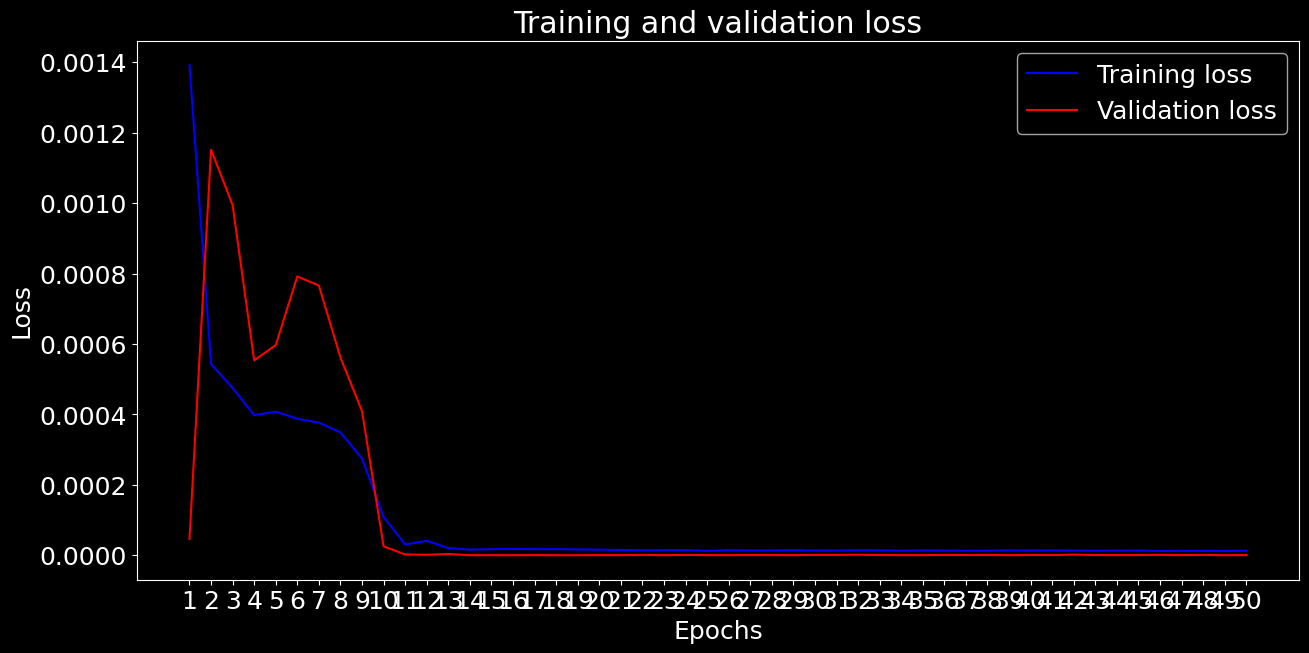

In [134]:
import matplotlib.pyplot as plt

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
loss_values50 = loss_values[0:150]
val_loss_values50 = val_loss_values[0:150]
epochs = range(1, len(loss_values50) + 1)
plt.plot(epochs, loss_values50, 'b',color = 'blue', label='Training loss')
plt.plot(epochs, val_loss_values50, 'b',color='red', label='Validation loss')
plt.rc('font', size = 18)
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.xticks(epochs)
fig = plt.gcf()
fig.set_size_inches(15,7)
#fig.savefig('img/tcstest&validationlosscnn.png', dpi=300)
plt.show()

/tmp/ipykernel_180028/3069272747.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, mae, 'b',color = 'blue', label='Training error')
/tmp/ipykernel_180028/3069272747.py:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, vmae, 'b',color='red', label='Validation error')


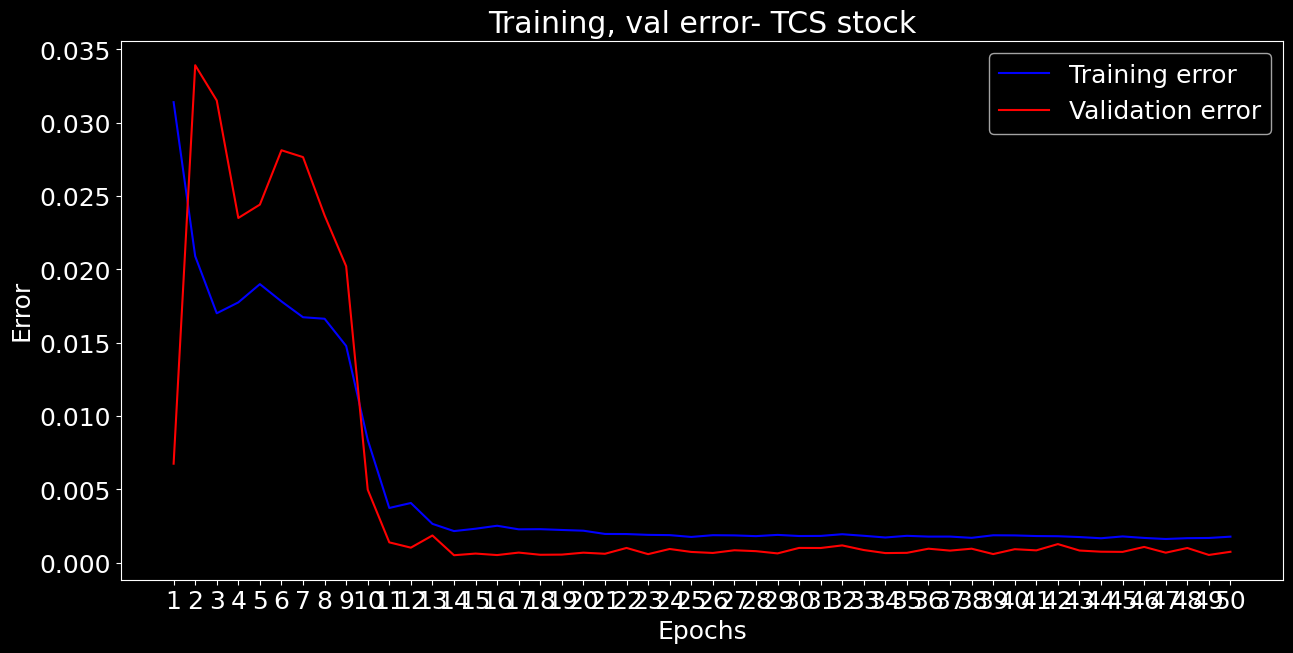

In [135]:
#dict_keys(['val_loss', 'val_mae', 'loss', 'mae'])

mae = history_dict['mae']
vmae = history_dict['val_mae']
epochs = range(1, len(mae) + 1)
plt.plot(epochs, mae, 'b',color = 'blue', label='Training error')
plt.plot(epochs, vmae, 'b',color='red', label='Validation error')
plt.title('Training, val error- TCS stock')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.legend()
plt.xticks(epochs)
fig = plt.gcf()
fig.set_size_inches(15,7)
#fig.savefig('img/tcstest&validationerrorcnn.png', dpi=300)
plt.show()

In [136]:
model.metrics_names

['loss', 'mae']

In [140]:
trainScore = model.evaluate(x_train, y_train, verbose=0)
testScore = model.evaluate(x_test, y_test, verbose=0)

In [141]:
#predicting values for y_test
p = model.predict(x_test)

10/10 [==============================] - 0s 36ms/step


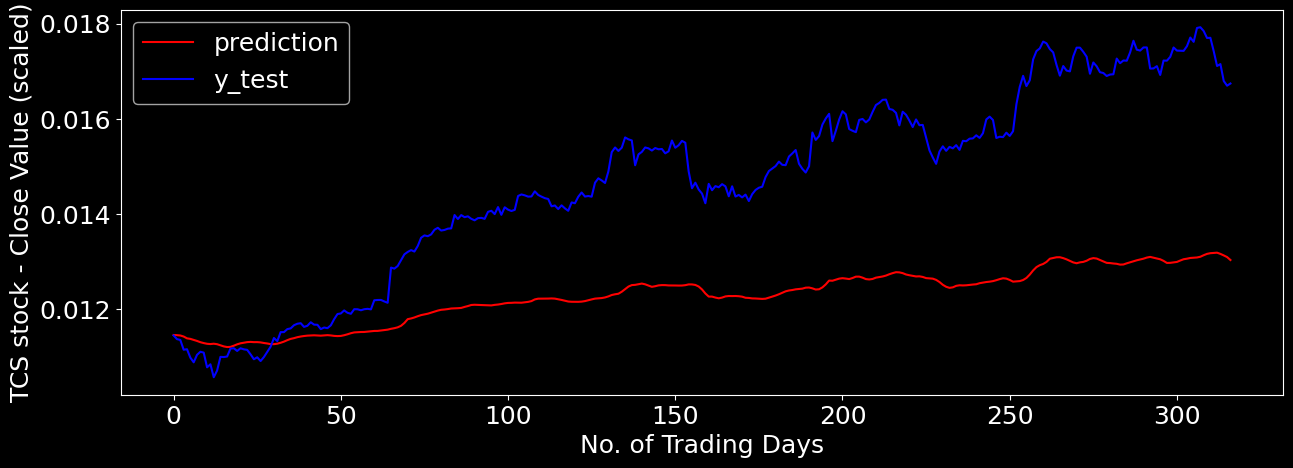

In [142]:
plt.plot(p,color='red', label='prediction')
plt.plot(y_test,color='blue', label='y_test')
plt.xlabel('No. of Trading Days')
plt.ylabel('TCS stock - Close Value (scaled)')
plt.legend(loc='upper left')
fig = plt.gcf()
fig.set_size_inches(15, 5)
#fig.savefig('img/tcstestcnn.png', dpi=300)
plt.show()

In [143]:
p1= model.predict(x_train)

40/40 [==============================] - 1s 17ms/step


ValueError: x and y must have same first dimension, but have shapes (212,) and (422, 1)

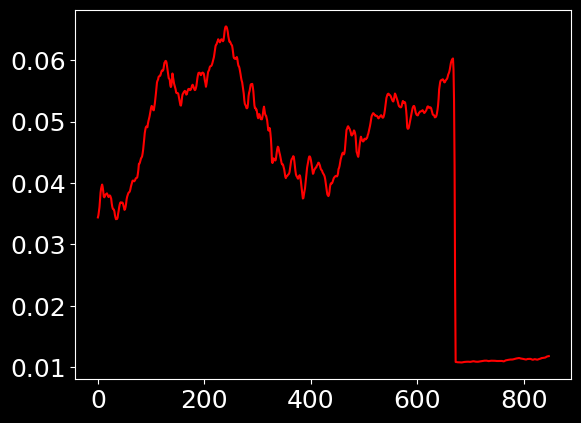

In [144]:
plt.plot(p1[:848],color='red', label='prediction on training data')
x = np.array(range(848,1060))
plt.plot(x,p1[848:],color = 'magenta',label ='prediction on validating data')
plt.plot(y_train,color='blue', label='y_train')
plt.xlabel('No. of Trading Days')
plt.ylabel('TCS - Close Value (scaled)')
plt.legend(loc='upper left')
fig = plt.gcf()
fig.set_size_inches(20,10)
#fig.savefig('img/tcstraincnn.png', dpi=300)
plt.show()

In [ ]:
y = y_test * 10000
y_pred = p.reshape(265)
y_pred = y_pred * 10000

ValueError: cannot reshape array of size 761 into shape (265,)

In [ ]:
from sklearn.metrics import mean_absolute_error

In [ ]:
print('Trainscore RMSE \tTrain Mean abs Error \tTestscore Rmse \t Test Mean abs Error')
print('%.9f \t\t %.9f \t\t %.9f \t\t %.9f' % (math.sqrt(trainScore[0]),trainScore[1],math.sqrt(testScore[0]),testScore[1]))

Trainscore RMSE 	Train Mean abs Error 	Testscore Rmse 	 Test Mean abs Error
0.006367980 		 0.005012411 		 0.008423769 		 0.005932457


In [ ]:
print('mean absolute error \t mean absolute percentage error')
print(' %.9f \t\t\t %.9f' % (mean_absolute_error(y,y_pred),(np.mean(np.abs((y - y_pred) / y)) * 100)))

mean absolute error 	 mean absolute percentage error
 59.324573998 			 2.097702599


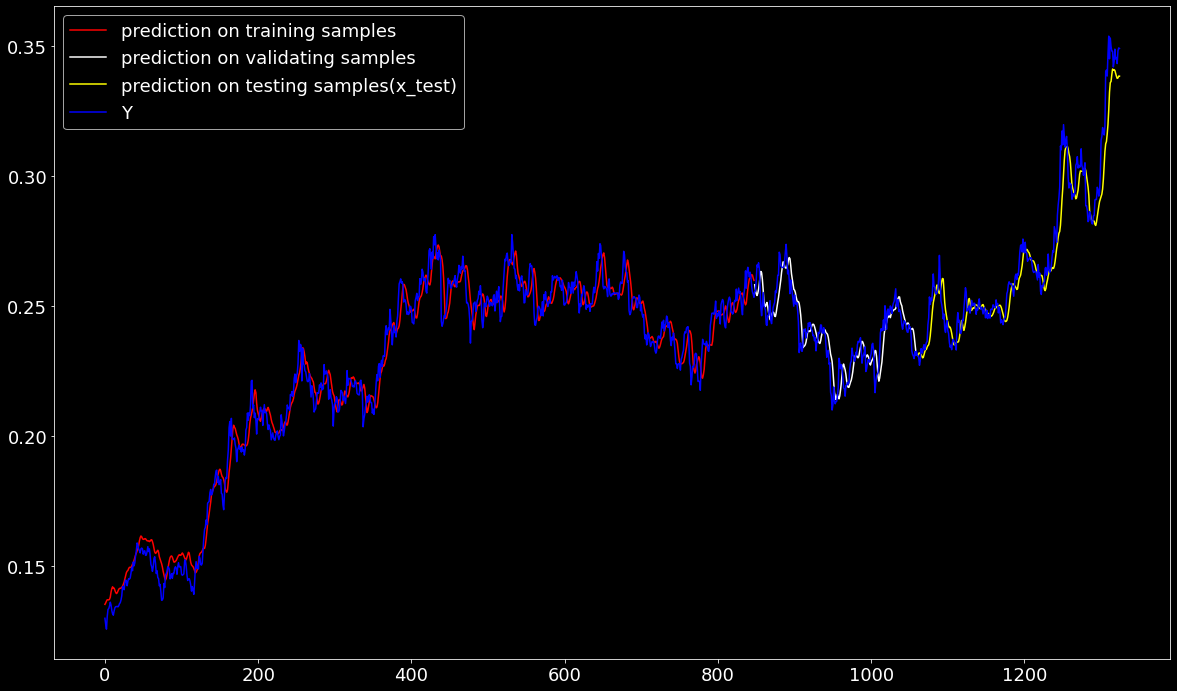

In [ ]:
Y = np.concatenate((y_train,y_test),axis = 0)
P = np.concatenate((p1,p),axis = 0)
#plotting the complete Y set with predicted values on x_train and x_test(variable p1 & p respectively given above)
#for 
plt.plot(P[:848],color='red', label='prediction on training samples')
#for validating samples
z = np.array(range(848,1060))
plt.plot(z,P[848:1060],color = 'white',label ='prediction on validating samples')
#for testing samples
x = np.array(range(1060,1325))
plt.plot(x,P[1060:],color = 'yellow',label ='prediction on testing samples(x_test)')

plt.plot(Y,color='blue', label='Y')
plt.legend(loc='upper left')
fig = plt.gcf()
fig.set_size_inches(20,12)
plt.show()